# Question 2(b)
Use an LLM to generate predictions see section 3 of [LLMTIME](https://arxiv.org/abs/2310.07820) for some ideas on
tokenisation of input, handling null values. Report only your best working prompting strategy
and their evaluations. (You are not expected to train/finetune an LLM nor use multimodal LLM
i.e you input pdf or screenshot, your input to the LLM should be PROMPT + string generated
from timeseries dataframe ideally by a script)

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Let's clean the data first.

In [38]:
data = pd.read_csv("AirtrafficA4.csv")
data['PASSENGERS CARRIED'] = data['PASSENGERS CARRIED'].str.replace(",", "").astype(float)
data.fillna(float(0), inplace=True)
data['MONTH'] = data['MONTH'].str.strip().replace({ 'JUNE': 'JUN', 'JULY': 'JUL' }).astype(str)
data['YEAR'] = data['YEAR'].astype(str)
data['TIMESTAMP'] = pd.to_datetime(data['YEAR'] + '-' + data['MONTH'] + '-01', format='%Y-%b-%d')
data.set_index('TIMESTAMP', inplace=True)
data = data.asfreq('MS')
data.sort_index(inplace=True)
data

,AIRLINE,YEAR,MONTH,TOTAL DEPARTURES,HOURS FLOWN,KILOMETRE FLOWN,PASSENGERS CARRIED,AVAILABLE SEAT KILOMETRE (IN THOUSAND),FREIGHT CARRIED (IN TONNE),MAIL CARRIED (IN TONNE)
TIMESTAMP,,,,,,,,,,
2013-01-01,A007,2013,JAN,"10,552","18,655","10,112",1408012.0,"18,20,105","6,465.00",0
2013-02-01,A007,2013,FEB,"9,873","17,374","9,439",1341210.0,"16,98,930","6,235.00",0
2013-03-01,A007,2013,MAR,"11,393","20,093","11,028",1423569.0,"19,84,886","6,505.00",0
2013-04-01,A007,2013,APR,"11,426","20,084","11,090",1511094.0,"19,96,084","5,903.00",0
2013-05-01,A007,2013,MAY,"11,885","20,779","11,533",1685168.0,"20,75,882","7,345.00",0
...,...,...,...,...,...,...,...,...,...,...
2023-04-01,A007,2023,APR,"48,752","84,232","42,615",7406440.0,"80,05,648","19,432.80","2,102.9"
2023-05-01,A007,2023,MAY,"50,956","87,917","44,505",8109626.0,"83,75,201","24,165.10","2,102.4"
2023-06-01,A007,2023,JUN,"49,989","86,217","43,739",7893296.0,"82,54,272","23,522.60","2,383.0"


Then generate the prompt

In [39]:
def format_for_prompt(row):
    return f"Airline {row['AIRLINE']}, Year {row['YEAR']}, Month {row['MONTH']}, Passengers Carried: {row['PASSENGERS CARRIED']}."

prompt_data = " ".join(data.apply(format_for_prompt, axis = 1).tolist())
prompt_data = " Given the following monthly airline passenger data, predict and display the values for next 12 months (2023 SEP to 2024 AUG) for Passengers Carried, you need not show any code or your though process, just the final predicted values must be displayed, there's a season of 4 months: " + prompt_data
prompt_data

" Given the following monthly airline passenger data, predict and display the values for next 12 months (2023 SEP to 2024 AUG) for Passengers Carried, you need not show any code or your though process, just the final predicted values must be displayed, there's a season of 4 months: Airline A007, Year 2013, Month JAN, Passengers Carried: 1408012.0. Airline A007, Year 2013, Month FEB, Passengers Carried: 1341210.0. Airline A007, Year 2013, Month MAR, Passengers Carried: 1423569.0. Airline A007, Year 2013, Month APR, Passengers Carried: 1511094.0. Airline A007, Year 2013, Month MAY, Passengers Carried: 1685168.0. Airline A007, Year 2013, Month JUN, Passengers Carried: 1480879.0. Airline A007, Year 2013, Month JUL, Passengers Carried: 1445248.0. Airline A007, Year 2013, Month AUG, Passengers Carried: 1531406.0. Airline A007, Year 2013, Month SEP, Passengers Carried: 1378691.0. Airline A007, Year 2013, Month OCT, Passengers Carried: 1510184.0. Airline A007, Year 2013, Month NOV, Passengers 

Here's the output predicted by GPT-4o:

|YEAR_MONTH|PASSENGERS CARRIED|
|----------|------------------|
|2023 SEP|7789024|
|2023 OCT|8122317|
|2023 NOV|8225536|
|2023 DEC|8504783|
|2024 JAN|7739815|
|2024 FEB|7631294|
|2024 MAR|8124572|
|2024 APR|8218501|
|2024 MAY|8802926|
|2024 JUN|8550792|
|2024 JUL|8289312|
|2024 AUG|8494387|

This gave a score of `2.50` on the Kaggle competition

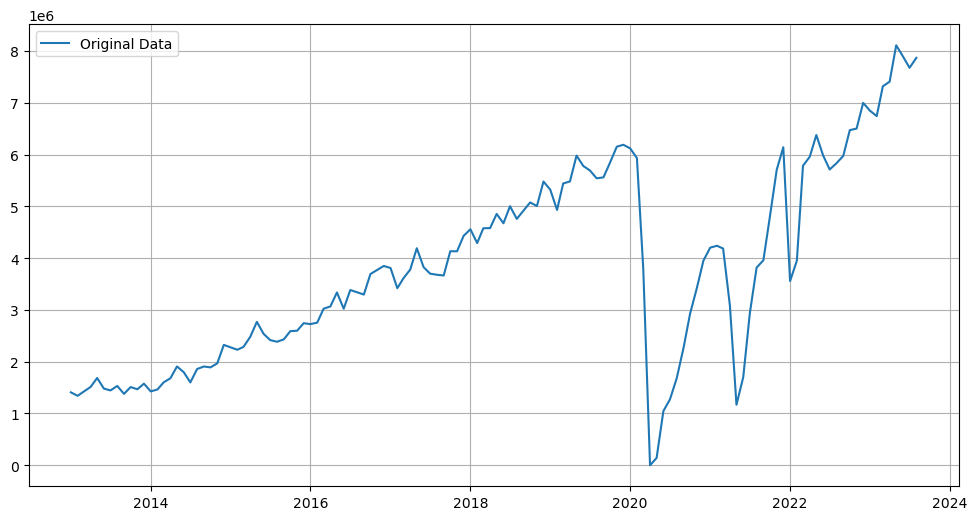

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(np.array(data.index), np.array(data['PASSENGERS CARRIED']), label='Original Data')
# plt.plot(future_data.index, future_data['PASSENGERS CARRIED'], label='Future Predictions', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('../images/1a.png')